In [146]:
import os
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
import re
#import numpy as np
from collections import Counter
#from fa2_modified import ForceAtlas2
import random

In [147]:
# set wd
os.chdir('/Users/kristineandersen/Desktop/Comp Tools for data science/Project/02807-project/data')

In [148]:
with open('yelp_academic_dataset_user.json', 'r') as f:
    user_counts = Counter(json.loads(line)['user_id'] for line in f)


In [149]:
# number of unique users
num_unique_users = len(user_counts)
print(f'Number of unique users: {num_unique_users}')

Number of unique users: 1987897


In [150]:
# preview data
df_head = pd.read_json('yelp_academic_dataset_user.json', lines=True, nrows=10)
df_head

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
7,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
8,lO1iq-f75hnPNZkTy3Zerg,Rachelle,40,2008-12-29 22:40:56,109,40,46,,"tOQDlz36rI__SOsbL-HCag, 83Xb0PPBwZiG2c_fLpZgAw...",7,...,0,0,3,0,3,4,5,5,3,1
9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0


In [151]:
# create graph
G = nx.Graph()
G.add_nodes_from(user_counts.keys())
with open('yelp_academic_dataset_user.json', 'r') as f:
    for line in f:
        user = json.loads(line)
        user_id = user['user_id']
        friends = user['friends'].split(', ') if user['friends'] != 'None' else []
        for friend in friends:
            if friend in user_counts:
                G.add_edge(user_id, friend)


In [152]:
degrees = [G.degree(node) for node in G.nodes()]
sorted(degrees)
no_friends = sum(count == 0 for count in degrees)
print(f'Number of users with no friends in the network: {no_friends}')

Number of users with no friends in the network: 1081718


In [153]:
number_of_nodes_full_network = G.number_of_nodes()
number_of_edges_full_network = G.number_of_edges()
print(f'Number of nodes in the graph: {number_of_nodes_full_network}')
print(f'Number of edges in the graph: {number_of_edges_full_network}')

Number of nodes in the graph: 1987897
Number of edges in the graph: 7305874


Because we have so many single nodes, we'd rather look at the greatest component in the network, thus filtering out the nodes not connected to any and smaller subgraphs.

In [154]:
# taking the greatest component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [155]:
number_of_nodes_greatest_component = G.number_of_nodes()
number_of_edges_greatest_component = G.number_of_edges()
print(f'Number of nodes in the graph: {number_of_nodes_greatest_component}')
print(f'Number of edges in the graph: {number_of_edges_greatest_component}')

Number of nodes in the graph: 892152
Number of edges in the graph: 7298492


In [156]:
removed_nodes = number_of_nodes_full_network-number_of_nodes_greatest_component
print(f'Number of nodes filtered away is {number_of_nodes_full_network-number_of_nodes_greatest_component}, where {removed_nodes-no_friends} had at least one friend, but were not connected to the greatest component')

Number of nodes filtered away is 1095745, where 14027 had at least one friend, but were not connected to the greatest component


In [157]:
removed_edges = number_of_edges_full_network-number_of_edges_greatest_component
print(f'Number of edges filtered away is {removed_edges}')

Number of edges filtered away is 7382


We can see that even though we filtered more than half of the edges away by only looking at the greatest component, we kept far most of the edges. From that, we know that many of the users with little to know friends were thinly connected together in small subgraphs.

In [158]:
# print degree stats
degrees_GC = [G.degree(node) for node in G.nodes()]
print(f'Average degree: {sum(degrees_GC)/G.number_of_nodes()}')
print(f'Highest degree: {max(degrees_GC)}')
print(f'Lowest degree: {min(degrees_GC)}')

Average degree: 16.361543772810016
Highest degree: 6868
Lowest degree: 1


In [159]:
# csv file with all user ids in the greatest component
with open('yelp_filtered_user_ids.csv', 'w') as f:
    f.write('user_id\n')
    for node in G.nodes():
        f.write(f'{node}\n')


In [ ]:
# Another way to create the subgraph
#start = max(H.degree, key=lambda x: x[1])[0]  # highest-degree node
#nodes = list(nx.ego_graph(H, start, radius=2).nodes())
#H_sub = H.subgraph(nodes).copy()


Although we have drastically cut down on the graph by only keeping the greatest component, it is still way too large to plot, thus we take 5000 random nodes and plot them just to get some visual 

In [160]:
# select 20000 random nodes
random.seed(123)
sampled_nodes = random.sample(list(G.nodes()), 20000)
H = G.subgraph(sampled_nodes).copy()


In [161]:
number_of_nodes_full_network = H.number_of_nodes()
number_of_edges_full_network = H.number_of_edges()
print(f'Number of nodes in the graph: {number_of_nodes_full_network}')
print(f'Number of edges in the graph: {number_of_edges_full_network}')

Number of nodes in the graph: 20000
Number of edges in the graph: 3759


In [162]:
# taking the greatest component
Hcc = sorted(nx.connected_components(H), key=len, reverse=True)
H = H.subgraph(Hcc[0])

In [163]:
number_of_nodes_full_network = H.number_of_nodes()
number_of_edges_full_network = H.number_of_edges()
print(f'Number of nodes in the graph: {number_of_nodes_full_network}')
print(f'Number of edges in the graph: {number_of_edges_full_network}')

Number of nodes in the graph: 1471
Number of edges in the graph: 2055


In [164]:
degrees_HC = [H.degree(node) for node in H.nodes()]
print(f'Average degree: {sum(degrees_HC)/H.number_of_nodes()}')
print(f'Highest degree: {max(degrees_HC)}')
print(f'Lowest degree: {min(degrees_HC)}')

Average degree: 2.7940176750509855
Highest degree: 67
Lowest degree: 1


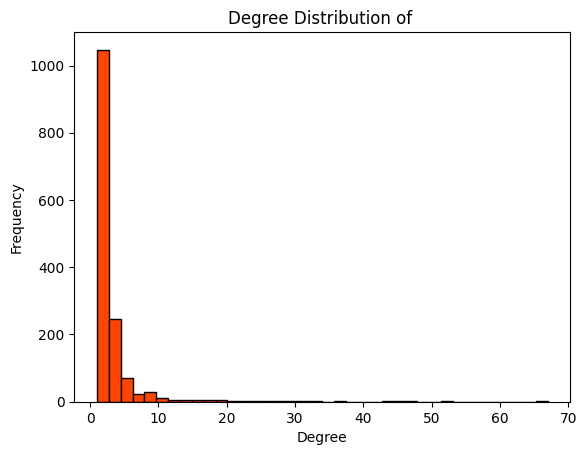

In [165]:
# plot the degree distribution in a histogram
plt.hist(degrees_HC, bins=38, color='orangered', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ')
plt.show()

Highly skewed degree distribution, with many nodes not having many friends.

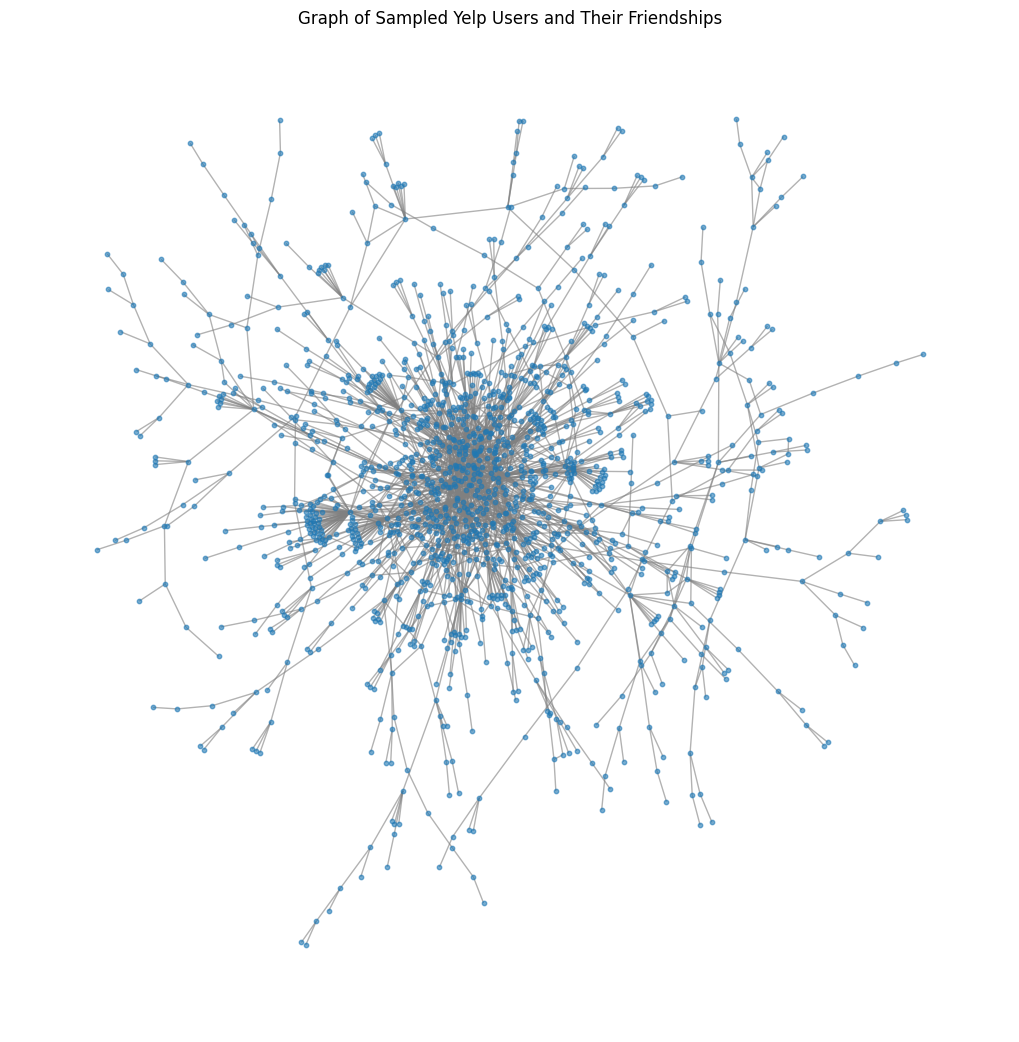

In [166]:
plt.figure(figsize=(10, 10))
nx.draw(H, node_size=10, alpha=0.6, edge_color="gray", with_labels=False)
plt.title("Graph of Sampled Yelp Users and Their Friendships")
plt.show()

In [167]:
def betweenness_centrality_normalized(graph):
    betweenness = dict.fromkeys(graph.keys(), 0.0)
    n = len(graph)

    for s in graph:
        stack = []
        predecessors = {v: [] for v in graph}
        sigma = dict.fromkeys(graph, 0)
        sigma[s] = 1
        distance = dict.fromkeys(graph, -1)
        distance[s] = 0

        from collections import deque
        queue = deque([s])
        while queue:
            v = queue.popleft()
            stack.append(v)
            for w in graph[v]:
                if distance[w] < 0:
                    distance[w] = distance[v] + 1
                    queue.append(w)
                if distance[w] == distance[v] + 1:
                    sigma[w] += sigma[v]
                    predecessors[w].append(v)

        delta = dict.fromkeys(graph, 0.0)
        while stack:
            w = stack.pop()
            for v in predecessors[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                betweenness[w] += delta[w]

    # compensate for undirected double-counting
    for v in betweenness:
        betweenness[v] /= 2.0

    # normalize like NetworkX for undirected graphs
    normalization_factor = 1 / ((n - 1) * (n - 2) / 2)
    for v in betweenness:
        betweenness[v] *= normalization_factor

    return betweenness


In [168]:
graph_dict = nx.to_dict_of_lists(H)

In [169]:
sorted_betweenness = sorted(betweenness_centrality_normalized(graph_dict).items(), key=lambda x: x[1], reverse=True)
print("Top 10 users by betweenness centrality:")
for user, centrality in sorted_betweenness[:10]:
    print(f'User ID: {user}, Betweenness Centrality: {centrality}')

Top 10 users by betweenness centrality:
User ID: DY9iixFRcPahIXSxO0hRiQ, Betweenness Centrality: 0.20276901092076507
User ID: 3mNz5nQFTIBQm0oU5mBR0w, Betweenness Centrality: 0.1904288326422511
User ID: xFJ5Ja8y40CdMa1sfC4-gg, Betweenness Centrality: 0.13089395754893873
User ID: LkXNQQaIc5yrKu9Ap87RrA, Betweenness Centrality: 0.12190895943772104
User ID: hpw7UrWf51aaWKbaGGJ2hA, Betweenness Centrality: 0.10902264055652282
User ID: V7B4KTBitlBs9YH_B00-9Q, Betweenness Centrality: 0.10622525323096181
User ID: ncvgNeEsAIAuMWYFN2blhg, Betweenness Centrality: 0.09279863723683829
User ID: RmDRlZsRr63cAWpmomMJrw, Betweenness Centrality: 0.08982984537755935
User ID: etPuuIH4-PdRhsjn5PZkzA, Betweenness Centrality: 0.08381841504471088
User ID: Lr-B-r-KF80yFy-2u336bw, Betweenness Centrality: 0.08260832862343644


In [170]:
# Comparing to the built-in function
betweenness_centrality_built_in = nx.betweenness_centrality(H)
sorted_betweenness_built_in = sorted(betweenness_centrality_built_in.items(), key=lambda x: x[1], reverse=True)
print("Top 10 users by betweenness centrality (built-in):")
for user, centrality in sorted_betweenness_built_in[:10]:
    print(f'User ID: {user}, Betweenness Centrality: {centrality}')

Top 10 users by betweenness centrality (built-in):
User ID: DY9iixFRcPahIXSxO0hRiQ, Betweenness Centrality: 0.20276901092076507
User ID: 3mNz5nQFTIBQm0oU5mBR0w, Betweenness Centrality: 0.1904288326422511
User ID: xFJ5Ja8y40CdMa1sfC4-gg, Betweenness Centrality: 0.13089395754893873
User ID: LkXNQQaIc5yrKu9Ap87RrA, Betweenness Centrality: 0.12190895943772104
User ID: hpw7UrWf51aaWKbaGGJ2hA, Betweenness Centrality: 0.10902264055652282
User ID: V7B4KTBitlBs9YH_B00-9Q, Betweenness Centrality: 0.10622525323096181
User ID: ncvgNeEsAIAuMWYFN2blhg, Betweenness Centrality: 0.09279863723683829
User ID: RmDRlZsRr63cAWpmomMJrw, Betweenness Centrality: 0.08982984537755935
User ID: etPuuIH4-PdRhsjn5PZkzA, Betweenness Centrality: 0.08381841504471088
User ID: Lr-B-r-KF80yFy-2u336bw, Betweenness Centrality: 0.08260832862343644


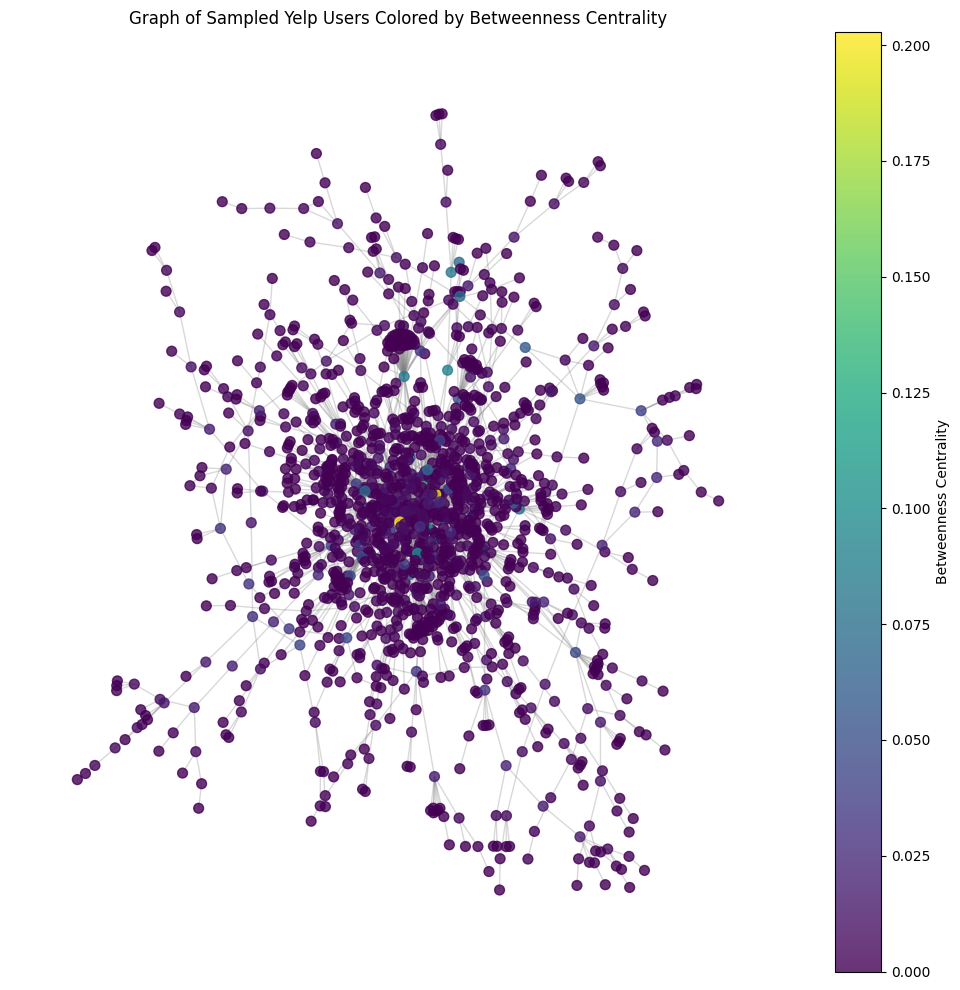

In [171]:
node_colors = [betweenness_centrality_built_in[n] for n in H.nodes()]

pos = nx.spring_layout(H, seed=42)

fig, ax = plt.subplots(figsize=(10, 10))

nodes = nx.draw_networkx_nodes(
    H, pos, ax=ax,
    node_size=50,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    alpha=0.8
)
nx.draw_networkx_edges(H, pos, ax=ax, edge_color="gray", alpha=0.3)

ax.set_title("Graph of Sampled Yelp Users Colored by Betweenness Centrality")
ax.set_axis_off()

cbar = fig.colorbar(nodes, ax=ax)
cbar.set_label("Betweenness Centrality")

plt.tight_layout()
plt.show()

Because our graph is clearly a big messy hairball, the spectral (Laplacian) (3 code cells below) will not be a big help in finding the underlying structures. However Louvian communities might be better.

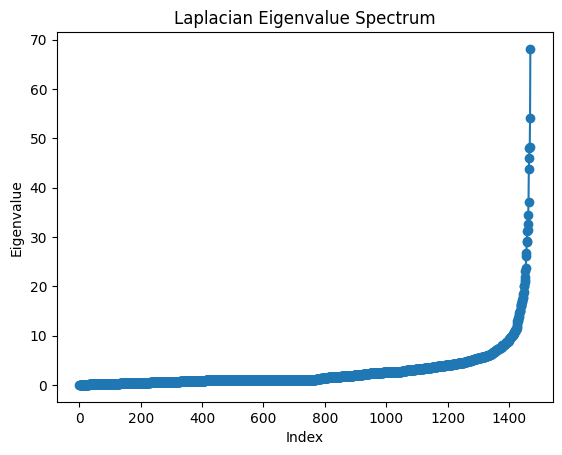

In [172]:
L = nx.laplacian_matrix(H).toarray()

eigvals = np.sort(np.linalg.eigvalsh(L))
plt.plot(eigvals, marker='o')
plt.title("Laplacian Eigenvalue Spectrum")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()


In [173]:
import numpy as np
from sklearn.cluster import KMeans
 
def spectral_clustering(graph, k):
    """
    Perform spectral clustering on an unweighted, undirected graph.
    graph: dict where keys are nodes and values are lists of neighbors.
    k: number of clusters.
    Returns: dict of node -> cluster label.
    """
    nodes = list(graph.keys())
    n = len(nodes)
   
    # Adjacency matrix
    A = np.zeros((n, n))
    for i, u in enumerate(nodes):
        for v in graph[u]:
            j = nodes.index(v)
            A[i, j] = 1
   
    # Degree matrix
    D = np.diag(A.sum(axis=1))
   
    # Laplacian
    L = D - A
   
    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(L)
   
    # Take first k eigenvectors (smallest eigenvalues)
    U = eigvecs[:, :k]

    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(U)
    labels = kmeans.labels_
   
    return dict(zip(nodes, labels))
 

In [174]:
mods = {}
for k in range(2, 30):
    labels = spectral_clustering(graph_dict, k)
    communities = {}
    for node, lbl in labels.items():
        communities.setdefault(lbl, []).append(node)
    mods[k] = nx.algorithms.community.quality.modularity(H, communities.values())

print(mods)
print("Optimal number of clusters (k) based on highest modularity:", max(mods, key=mods.get))

{2: 0.053908631845655655, 3: 0.05468011674096175, 4: 0.11202183269102121, 5: 0.12741482704933066, 6: 0.13909188318799903, 7: 0.14858223666684428, 8: 0.15833472451619385, 9: 0.23296215390626387, 10: 0.24299524629856556, 11: 0.27636090243368205, 12: 0.290759467443361, 13: 0.3050442514548221, 14: 0.29300998691696123, 15: 0.30710355728417427, 16: 0.30865422297997297, 17: 0.309937071175283, 18: 0.3406414832969258, 19: 0.30954162004724095, 20: 0.3207566850776397, 21: 0.30272375844329596, 22: 0.31697302289235785, 23: 0.314388145938042, 24: 0.31139526761030306, 25: 0.31269599398535414, 26: 0.32527998295061006, 27: 0.3298708863906796, 28: 0.3286602613055807, 29: 0.33590068730353245}
Optimal number of clusters (k) based on highest modularity: 18


In [175]:
import community.community_louvain as community_louvain

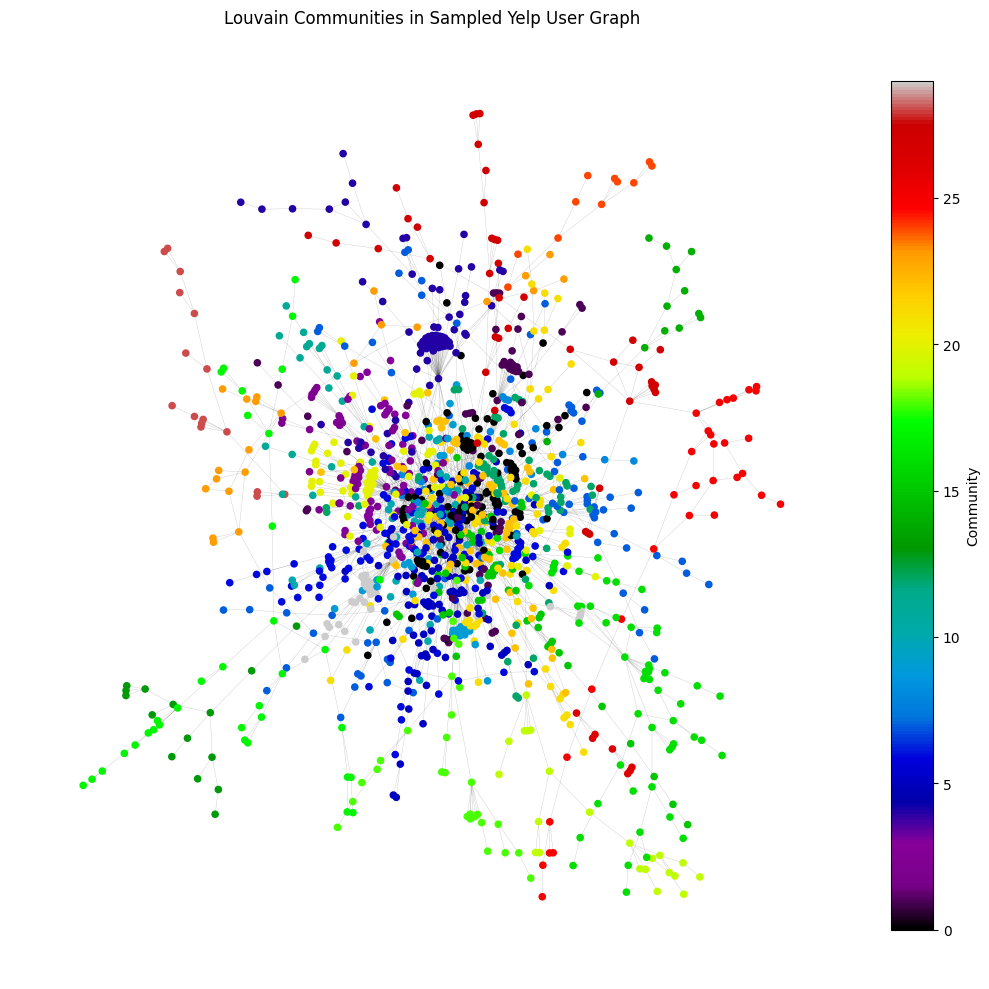

In [176]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain  # correct import

# Louvain partition
partition = community_louvain.best_partition(H)

# Map community labels
com_ids = {c: i for i, c in enumerate(sorted(set(partition.values())))}
node_colors = [com_ids[partition[n]] for n in H.nodes()]
num_comms = len(com_ids)

pos = nx.spring_layout(H, seed=42)

fig, ax = plt.subplots(figsize=(10, 10))
nodes = nx.draw_networkx_nodes(
    H, pos, ax=ax,
    nodelist=list(H.nodes()),
    node_size=20,
    node_color=node_colors,
    cmap=plt.cm.tab20 if num_comms <= 20 else plt.cm.viridis
)
nx.draw_networkx_edges(H, pos, ax=ax, alpha=0.3, width=0.2)
# Use a qualitative colormap for better distinction between communities
nodes.set_cmap(plt.cm.tab20b if num_comms <= 20 else plt.cm.nipy_spectral)
ax.set_title("Louvain Communities in Sampled Yelp User Graph")
ax.set_axis_off()

cbar = fig.colorbar(nodes, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Community")
if num_comms <= 20:
    cbar.set_ticks(range(num_comms))
    cbar.set_ticklabels(range(num_comms))

plt.tight_layout()
plt.show()


In [177]:
# print the community sizes
community_sizes = Counter(partition.values())
print("Community sizes:")
for comm_id, size in community_sizes.items():
    print(f'Community {comm_id}: {size} nodes')

Community sizes:
Community 0: 116 nodes
Community 1: 66 nodes
Community 2: 44 nodes
Community 3: 51 nodes
Community 4: 83 nodes
Community 5: 105 nodes
Community 6: 108 nodes
Community 7: 84 nodes
Community 8: 24 nodes
Community 9: 35 nodes
Community 10: 43 nodes
Community 21: 80 nodes
Community 12: 72 nodes
Community 13: 15 nodes
Community 14: 13 nodes
Community 15: 50 nodes
Community 16: 57 nodes
Community 17: 36 nodes
Community 19: 22 nodes
Community 20: 71 nodes
Community 22: 81 nodes
Community 23: 23 nodes
Community 25: 31 nodes
Community 28: 16 nodes
Community 29: 37 nodes
Community 27: 41 nodes
Community 11: 20 nodes
Community 18: 29 nodes
Community 24: 11 nodes
Community 26: 7 nodes


In [178]:
import pandas as pd
sizes = pd.Series(list(partition.values())).value_counts()
print(sizes)


0     116
6     108
5     105
7      84
4      83
22     81
21     80
12     72
20     71
1      66
16     57
3      51
15     50
2      44
10     43
27     41
29     37
17     36
9      35
25     31
18     29
8      24
23     23
19     22
11     20
28     16
13     15
14     13
24     11
26      7
Name: count, dtype: int64


In [179]:
import networkx as nx
from networkx.algorithms.community import modularity

comms = {}
for n,c in partition.items():
    comms.setdefault(c, []).append(n)

modularity_score = modularity(H, comms.values())
print(modularity_score)


0.7599331048241483


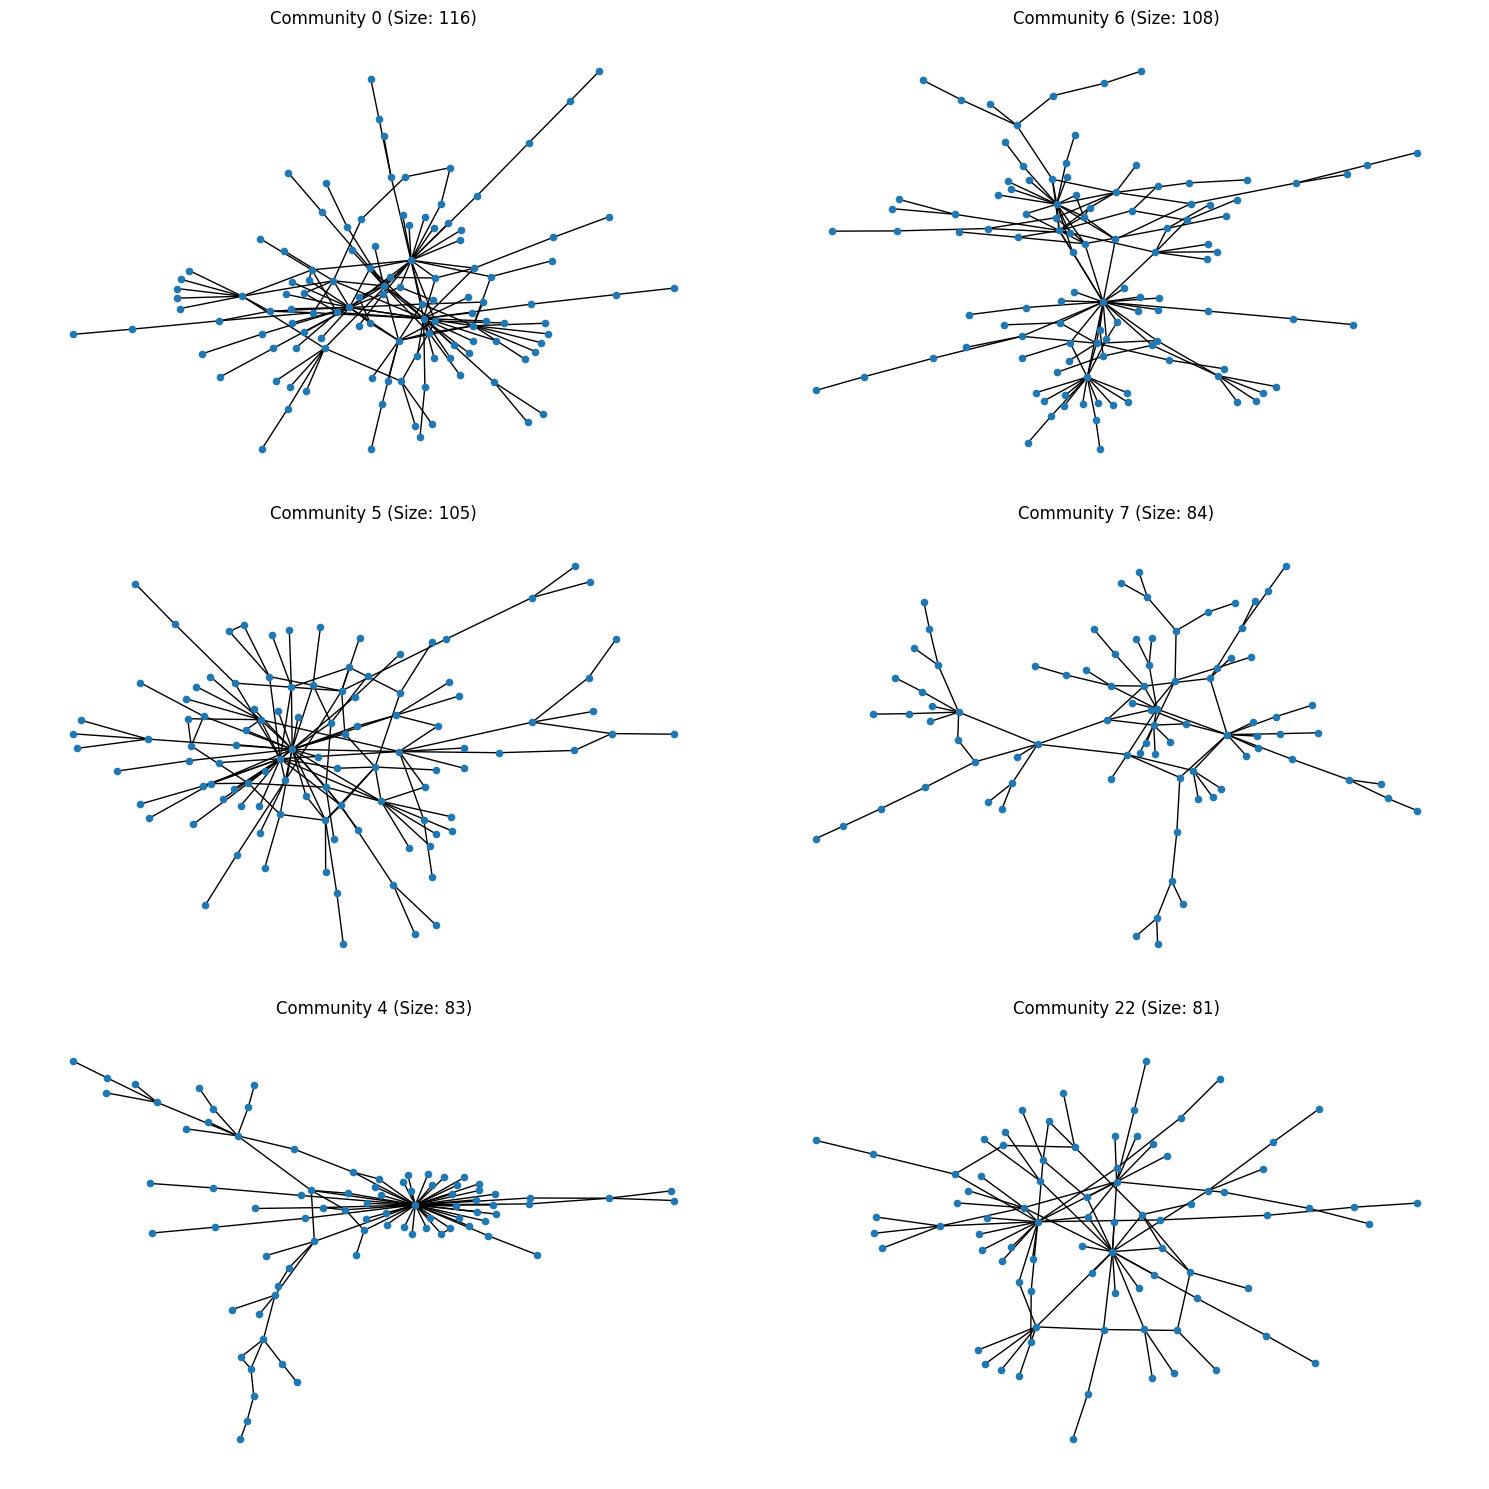

In [180]:
top_6_communities = sizes.index[:6]

plt.figure(figsize=(15, 15))
for i, community in enumerate(top_6_communities, 1):
    nodes = [n for n, c in partition.items() if c == community]
    sub = H.subgraph(nodes)
    plt.subplot(3, 2, i)
    nx.draw(sub, with_labels=False, node_size=20)
    plt.title(f'Community {community} (Size: {sizes[community]})')

plt.tight_layout()
plt.show()


In [181]:
# import user id and review in data/yelp_academic_dataset_review.json
import json
user_reviews = {}
with open('yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        user_id = review['user_id']
        text = review['text']
        user_reviews.setdefault(user_id, []).append(text)



In [182]:
# adding review as attribute in H
for node in H.nodes():
    reviews = user_reviews.get(node, [])
    H.nodes[node]['reviews'] = reviews



VADER Sentiment Analysis

In [183]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# calculate sentiment scores for each user in H and add it as attribute
for node in H.nodes():
    reviews = H.nodes[node]['reviews']
    sentiment_scores = [sia.polarity_scores(review) for review in reviews]
    H.nodes[node]['sentiment_scores'] = sentiment_scores



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kristineandersen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# print a random node
random_node = random.choice(list(H.nodes()))
print(f'Node ID: {random_node}')
print(f'Attributes: {H.nodes[random_node]}')

Node ID: oVx8aCxX6o9PrnSZSAeP3w
Attributes: {'reviews': ["So glad we stumbled upon this place! The food is so fresh, the restaurant is so clean, the service is super friendly and there's lots to look around at while you wait for your food. There is even a children's book about conquering fear that the owner wrote, and is on display. I read it to my kids and it helped pass the time. I definitely recommend trying this place out if you're coming to the area. I'm saving this place for sure, for next time! Thanks for making us feel so welcomed! See you next summer!"], 'sentiment_scores': [{'neg': 0.027, 'neu': 0.705, 'pos': 0.268, 'compound': 0.9806}]}


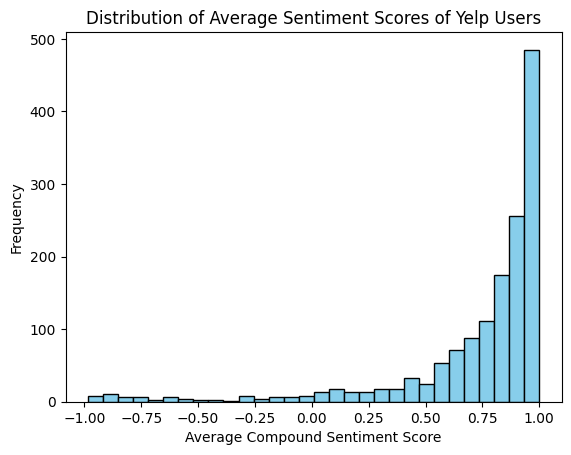

In [185]:
# plot based on sentiment scores
average_sentiments = []
for node in H.nodes():
    scores = H.nodes[node]['sentiment_scores']
    if scores:
        avg_score = sum(score['compound'] for score in scores) / len(scores)
    else:
        avg_score = 0
    average_sentiments.append(avg_score)

plt.hist(average_sentiments, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Sentiment Scores of Yelp Users')
plt.show()

### VADER Sentiment Score

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed to recognize sentiment expressed in text. It is particularly effective for analyzing social media text, reviews, and other informal communication.

#### Components of VADER Sentiment Score:
1. **Positive Score (`pos`)**: Represents the proportion of text that conveys a positive sentiment.
2. **Neutral Score (`neu`)**: Represents the proportion of text that conveys a neutral sentiment.
3. **Negative Score (`neg`)**: Represents the proportion of text that conveys a negative sentiment.
4. **Compound Score (`compound`)**: A normalized, weighted composite score that combines the positive, neutral, and negative scores into a single value. The compound score ranges from -1 (most negative) to +1 (most positive).

#### How It Works:
- VADER uses a pre-defined lexicon of words with associated sentiment intensities.
- It accounts for the context of words, such as negations ("not good"), intensifiers ("very good"), and punctuation/emojis that amplify sentiment.
- The compound score is often used as the primary metric to determine the overall sentiment of a text.

#### Interpretation of Compound Score:
- **Positive Sentiment**: Compound score > 0.05
- **Neutral Sentiment**: Compound score between -0.05 and 0.05
- **Negative Sentiment**: Compound score < -0.05

VADER is widely used due to its simplicity, speed, and effectiveness in analyzing sentiment in short, informal text.

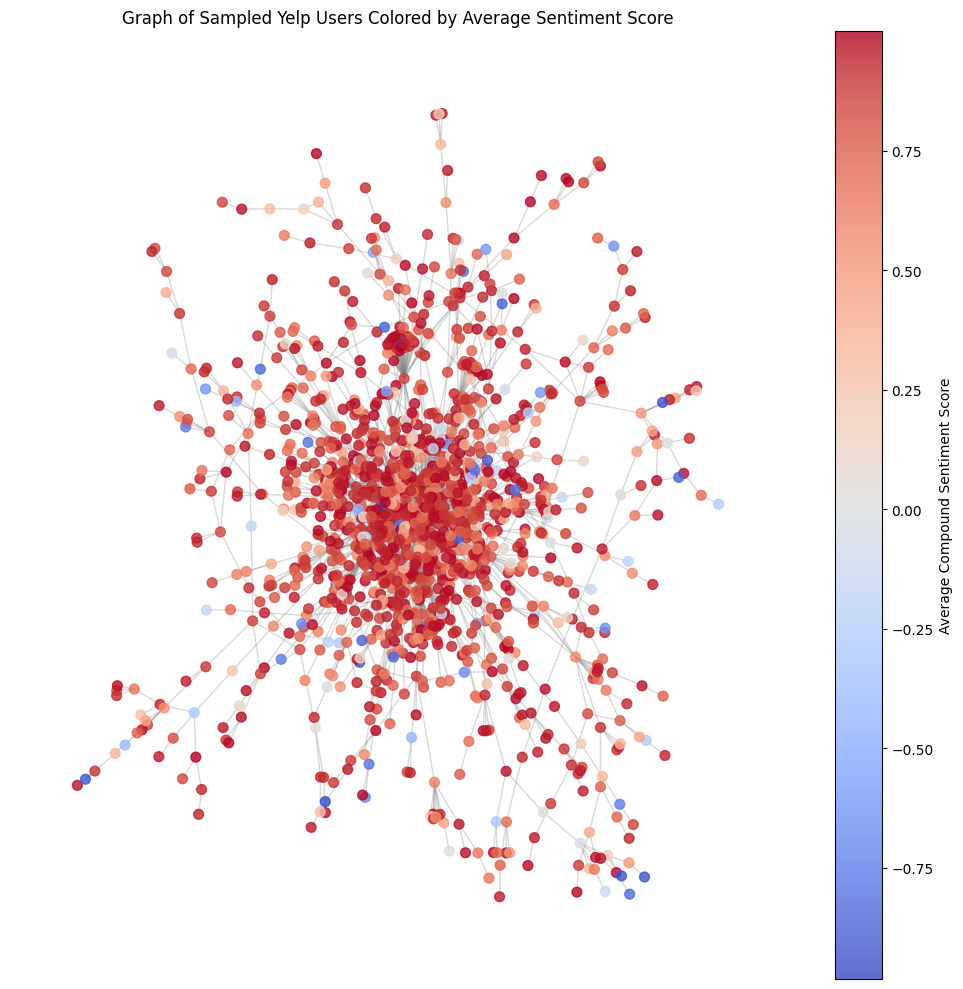

In [ ]:
# graph based on average sentiment score
node_colors = []
for node in H.nodes():
    scores = H.nodes[node]['sentiment_scores']
    if scores:
        avg_score = sum(score['compound'] for score in scores) / len(scores)
    else:
        avg_score = 0
    node_colors.append(avg_score)

pos = nx.spring_layout(H, seed=42)
fig, ax = plt.subplots(figsize=(10, 10))
nodes = nx.draw_networkx_nodes(
    H, pos, ax=ax,
    node_size=50,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    alpha=0.8
)
nx.draw_networkx_edges(H, pos, ax=ax, edge_color="gray", alpha=0.3)
ax.set_title("Graph of Sampled Yelp Users Colored by Average Sentiment Score")
ax.set_axis_off()
cbar = fig.colorbar(nodes, ax=ax)
cbar.set_label("Average Compound Sentiment Score")
plt.tight_layout()
plt.show()